In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Data Rank

In [4]:
# a rank 0 tensor; a scalar with shape [],
print(np.array(3.).shape) 

# a rank 1 tensor; a vector with shape [3]
print(np.array([1., 2., 3.]).shape) 

# a rank 2 tensor; a matrix with shape [2, 3]
print(np.array([[1., 2., 3.], [4., 5., 6.]]).shape) 

# a rank 3 tensor with shape [2, 1, 3]
print(np.array([[[1., 2., 3.]], [[7., 8., 9.]]]).shape) 

()
(3,)
(2, 3)
(2, 1, 3)


## Tensor
A generlization of vectors and matrices with n-dimensions and various data types

### In tensorflow, data vector / matrices are similar to numpy array
- constant
- variable
- placeholder

### In tensorflow, we have to convert eveything into "Tensor" !!

## Before everything start, just remember ...
1. graph = container
2. sess = liquid

## Constant, Placeholder, and Variables
1. constant: fixed item. the value cannot be changed during training
2. placeholder: we can pass item to the graph interactively. (common used for input, ground truth label, and other flags)
3. variable: dynamic item. the value can be changed during training. (need to be initialized for each session)

In [6]:
sess = tf.Session() # start a session

# constant: fixed item, rarely used, the value cannot be changed during training
a = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
print(a)
print(sess.run(a))

Tensor("Const_1:0", shape=(2, 2), dtype=float32)
[[ 1.  2.]
 [ 3.  4.]]


In [9]:
# placeholder: used very often!
b = tf.placeholder(shape=[2], dtype=tf.float32)

my_input_array = np.array([1,1])

sess.run(b, feed_dict={b: my_input_array })


array([ 1.,  1.], dtype=float32)

In [11]:
# variable: we alwayes use this. the value can change during training
c = tf.Variable([[1, 2], [3, 4]], dtype=tf.float32)

# initial variables: 
init = tf.global_variables_initializer()
sess.run(init)

sess.run(c)

array([[ 1.,  2.],
       [ 3.,  4.]], dtype=float32)

## Simple operations examples

In [12]:
x1 = tf.Variable([[1,2], [3,4]], dtype= tf.float32)
x2 = tf.Variable([[5,6], [7,8]], dtype= tf.float32)

mat_mul_ops = tf.matmul(x1, x2) # np.dot
element_wise_mul_ops = tf.multiply(x1, x2) # element-wise mul
add_ops = tf.add(x1, x2)

init = tf.global_variables_initializer()
sess.run(init)

res1, res2, res3 = sess.run([mat_mul_ops, element_wise_mul_ops, add_ops])
print(res1)
print("---")
print(res2)
print("---")
print(res3)

[[ 19.  22.]
 [ 43.  50.]]
---
[[  5.  12.]
 [ 21.  32.]]
---
[[  6.   8.]
 [ 10.  12.]]


In [13]:
take_sum_1 = tf.reduce_sum(x1, axis=0) # np.sum
take_sum_2 = tf.reduce_sum(x1, axis=1)
take_sum_3 = tf.reduce_sum(x1)
take_mean_1 = tf.reduce_mean(x1, axis = 0) # np.mean
take_mean_2 = tf.reduce_mean(x1, axis = 1)
take_mean_3 = tf.reduce_mean(x1)

sess.run(tf.global_variables_initializer())
print(sess.run(x1))
print('---')
print(sess.run(take_sum_1))
print(sess.run(take_sum_2))
print(sess.run(take_sum_3))
print(sess.run(take_mean_1))
print(sess.run(take_mean_2))
print(sess.run(take_mean_3))


[[ 1.  2.]
 [ 3.  4.]]
---
[ 4.  6.]
[ 3.  7.]
10.0
[ 2.  3.]
[ 1.5  3.5]
2.5


In [15]:
index_counter = tf.Variable(0)
one = tf.constant(1)

new_index = tf.add(index_counter, one)
update_ops = tf.assign(index_counter, new_index) # if the value change, you have to "assign" it

init = tf.global_variables_initializer()
sess.run(init)
for _ in np.arange(10):
    sess.run(update_ops)
    print(sess.run(index_counter))

0
0
0
0
0
0
0
0
0
0


## A linear regression example
$ y = 3x + b $

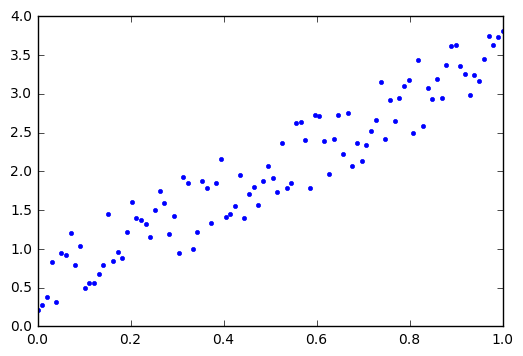

step: 0, weight: 1.06556 bias: 0.31608
step: 25, weight: 2.00053 bias: 1.05216
step: 50, weight: 2.30047 bias: 0.892238
step: 75, weight: 2.51425 bias: 0.777668
step: 100, weight: 2.66679 bias: 0.695917
step: 125, weight: 2.77563 bias: 0.637585
step: 150, weight: 2.85329 bias: 0.595963
step: 175, weight: 2.90871 bias: 0.566263
step: 200, weight: 2.94825 bias: 0.545071
step: 225, weight: 2.97647 bias: 0.52995
step: 250, weight: 2.9966 bias: 0.519161
step: 275, weight: 3.01096 bias: 0.511462
step: 300, weight: 3.02121 bias: 0.505969
step: 325, weight: 3.02853 bias: 0.502049
step: 350, weight: 3.03375 bias: 0.499252
step: 375, weight: 3.03747 bias: 0.497257
step: 400, weight: 3.04013 bias: 0.495832
step: 425, weight: 3.04202 bias: 0.494816
step: 450, weight: 3.04338 bias: 0.494091
step: 475, weight: 3.04434 bias: 0.493574


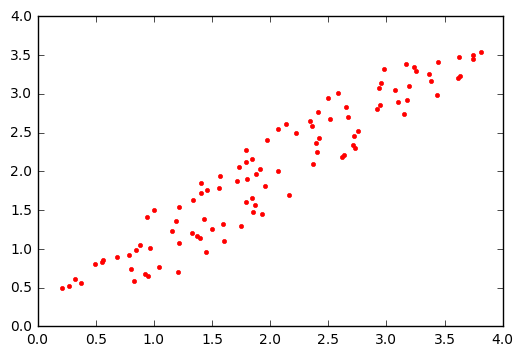

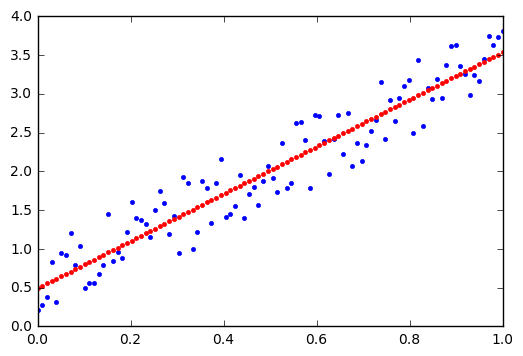

In [16]:
tf.reset_default_graph()
x_in = np.linspace(0, 1, 100)
y_true = (3 * x_in) + np.random.rand(len(x_in))
plt.plot(x_in, y_true, 'b.')
plt.show()

## build the regression fomula
w1 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), dtype= tf.float32)
b1 = tf.Variable(tf.zeros([1]))

y_pred = (w1 * x_in) + b1
loss = tf.reduce_mean(tf.square(y_pred - y_true))

optim = tf.train.GradientDescentOptimizer(0.1)
train_ops = optim.minimize(loss)

## train the model
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for step in np.arange(500):
    sess.run(train_ops)
    if step % 25 == 0:
        print('step: ' + str(step) + ', weight: ' + str(sess.run(w1)[0]) + ' bias: ' + str(sess.run(b1)[0]) )
        
y_out = sess.run(y_pred)

plt.plot(y_true, y_out, 'r.')
plt.show()

plt.plot(x_in, y_true, 'b.')
plt.plot(x_in, y_out, 'r.')
plt.show()

sess.close()

## Exercise
### 請依照上面的 case, 計算 $y = 2x^2 + 3x + c$
設定 x_in = np.linspace(0, 1, 100)
